In [20]:
from statsmodels import api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as manimation
import os
from matplotlib.animation import FuncAnimation
import imageio
import os
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms

In [33]:
df = pd.read_csv('jerusalem_temperature.csv',
                #  encoding = "ISO-8859-8",  # this shows hebrew characters properly
                 na_values=["-"]           # substitute "-" for NaN
                 )
df['timestamp'] = pd.to_datetime(df['Date & Time (Summer)'], dayfirst=True)
df = df.set_index('timestamp')
# # resample to daily data according to "mean"
# df = df.resample('D').mean()
# # convert hecto pascals (hPa) to kilo pascals (kPa)
# df["Pressure (kPa)"] = df["Pressure at station level (hPa)"] / 10.0
df

,Station,Date & Time (Summer),Temperature (°C)
timestamp,,,
2023-06-01 00:00:00,Jerusalem Givat Ram,01/06/2023 00:00,19.9
2023-06-01 00:10:00,Jerusalem Givat Ram,01/06/2023 00:10,19.8
2023-06-01 00:20:00,Jerusalem Givat Ram,01/06/2023 00:20,19.7
2023-06-01 00:30:00,Jerusalem Givat Ram,01/06/2023 00:30,19.8
2023-06-01 00:40:00,Jerusalem Givat Ram,01/06/2023 00:40,19.9
...,...,...,...
2023-06-10 22:20:00,Jerusalem Givat Ram,10/06/2023 22:20,18.6
2023-06-10 22:30:00,Jerusalem Givat Ram,10/06/2023 22:30,18.6
2023-06-10 22:40:00,Jerusalem Givat Ram,10/06/2023 22:40,18.6


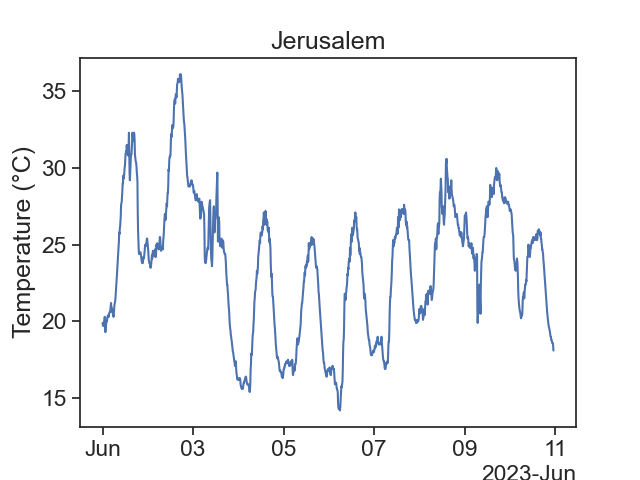

In [37]:
%matplotlib widget
fig, ax = plt.subplots(1)
ax.plot(df['Temperature (°C)'])
locator = mdates.AutoDateLocator(minticks=5, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set(ylabel="Temperature (°C)",
       title="Jerusalem")
fig.savefig("jer_temp1.png", dpi=300, bbox_inches='tight')

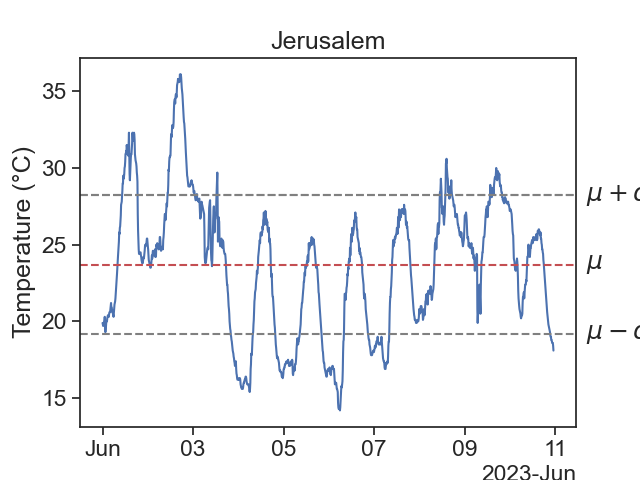

In [36]:
%matplotlib widget
fig, ax = plt.subplots(1)
ax.plot(df['Temperature (°C)'])

avg = df['Temperature (°C)'].mean()
std = df['Temperature (°C)'].std()

ax.axhline(y=avg, color='r', linestyle='--')
ax.axhline(y=avg+std, color='gray', linestyle='--')
ax.axhline(y=avg+std, color='gray', linestyle='--')
ax.axhline(y=avg-std, color='gray', linestyle='--')

# the x coords of this transformation are axes, and the
# y coord are data
trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
ax.text(1.02, avg, r"$\mu$", transform=trans, va="center", ha="left")
ax.text(1.02, avg+std, r"$\mu+\sigma$", transform=trans, va="center", ha="left")
ax.text(1.02, avg-std, r"$\mu-\sigma$", transform=trans, va="center", ha="left")


locator = mdates.AutoDateLocator(minticks=5, maxticks=9)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.set(ylabel="Temperature (°C)",
       title="Jerusalem")
fig.savefig("jer_temp2.png", dpi=300, bbox_inches='tight')

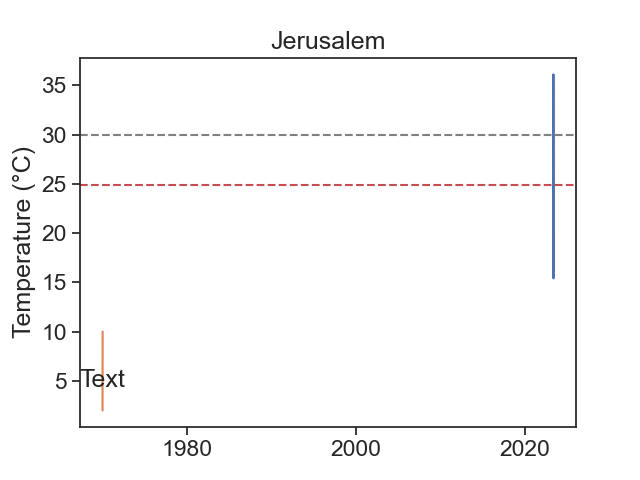